## Basin Hopping Algorithm

Basin Hopping is a global optimization framework. It is suited for hard nonlinear optimization problems with multiple variables and multimodals. It is effective for the characterization of biological macromolecules. Basin Hopping combines heuristic procedures with local searches to enhance its exploration of the given variable space, conducted as a series of perturbations followed by local optimization. The core advantage of the Basin Hopping framework over a multistart method that essentially samples local minima at random is that Basin Hopping moves between adjacent local minima in the variable space. This strategy is more effective when exploring high-dimensional variable spaces associated with complex physical systems, where the addition of new dimensions can result in an exponential increase in the number of minima in the space. The Basin Hopping framework originated in the computational biology community dating back to the pioneering work of Wales, where the objective was to characterize the minima of the Lennard-Jones energy function in small atomic clusters. The term basin hopping was coined in this work. The BH framework is particularly suited to deal with molecular spaces, where the function sought for optimization is a complex nonconvex potential energy function summing over the interactions among atoms in a 3-dimensional molecular structure.

Source: https://www.hindawi.com/journals/aai/2012/674832/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    
    E = 0
    N_atom = int(len(positions)/3)
    
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def neighbor(pos_now, kT):
    N = len(pos_now)
    return pos_now + kT*np.random.random_sample((N,))

def acceptance_probability(dE, kT):
    if dE<0:
        return 1
    else:
        return np.exp(-dE/kT)

In [6]:
N_atom = 11
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)        


basinhopping step 0: f -21.7782
basinhopping step 1: f -22.8215 trial_f -22.8215 accepted 1  lowest_f -22.8215
found new global minimum on step 1 with function value -22.8215
basinhopping step 2: f -22.8215 trial_f -22.8215 accepted 1  lowest_f -22.8215
basinhopping step 3: f -22.7653 trial_f -22.7653 accepted 1  lowest_f -22.8215
basinhopping step 4: f -21.8287 trial_f -21.8287 accepted 1  lowest_f -22.8215
basinhopping step 5: f -22.1893 trial_f -22.1893 accepted 1  lowest_f -22.8215
basinhopping step 6: f -21.8568 trial_f -21.8568 accepted 1  lowest_f -22.8215
basinhopping step 7: f -22.8215 trial_f -22.8215 accepted 1  lowest_f -22.8215
basinhopping step 8: f -22.8215 trial_f -22.8215 accepted 1  lowest_f -22.8215
basinhopping step 9: f -30.922 trial_f -30.922 accepted 1  lowest_f -30.922
found new global minimum on step 9 with function value -30.922
basinhopping step 10: f -30.6357 trial_f -30.6357 accepted 1  lowest_f -30.922
basinhopping step 11: f -31.9147 trial_f -31.9147 acce

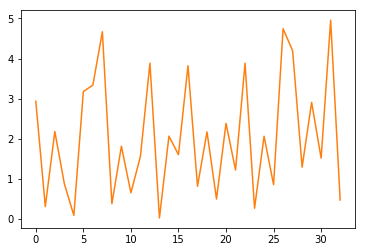

In [9]:
import matplotlib.pyplot as plt

plt.plot(pos)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    
    E = 0
    N_atom = int(len(positions)/3)
    
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def neighbor(pos_now, kT):
    N = len(pos_now)
    return pos_now + kT*np.random.random_sample((N,))

def acceptance_probability(dE, kT):
    if dE<0:
        return 1
    else:
        return np.exp(-dE/kT)

In [11]:
N_atom = 15
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)        

basinhopping step 0: f -46.4601
basinhopping step 1: f -46.9668 trial_f -46.9668 accepted 1  lowest_f -46.9668
found new global minimum on step 1 with function value -46.9668
basinhopping step 2: f -48.523 trial_f -48.523 accepted 1  lowest_f -48.523
found new global minimum on step 2 with function value -48.523
basinhopping step 3: f -49.021 trial_f -49.021 accepted 1  lowest_f -49.021
found new global minimum on step 3 with function value -49.021
basinhopping step 4: f -52.3226 trial_f -52.3226 accepted 1  lowest_f -52.3226
found new global minimum on step 4 with function value -52.3226
basinhopping step 5: f -48.5777 trial_f -48.5777 accepted 1  lowest_f -52.3226
basinhopping step 6: f -49.3724 trial_f -49.3724 accepted 1  lowest_f -52.3226
basinhopping step 7: f -48.3872 trial_f -48.3872 accepted 1  lowest_f -52.3226
basinhopping step 8: f -46.2196 trial_f -46.2196 accepted 1  lowest_f -52.3226
basinhopping step 9: f -46.2196 trial_f -22.166 accepted 0  lowest_f -52.3226
basinhoppi

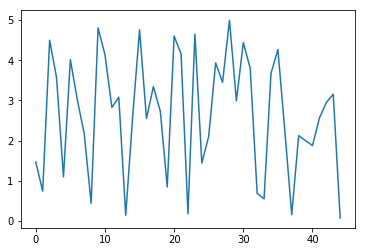

In [12]:
import matplotlib.pyplot as plt

plt.plot(pos)
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def total_energy(positions):
    
    E = 0
    N_atom = int(len(positions)/3)
    
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1-pos2)
            E += LJ(dist)
    return E
            
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

def neighbor(pos_now, kT):
    N = len(pos_now)
    return pos_now + kT*np.random.random_sample((N,))

def acceptance_probability(dE, kT):
    if dE<0:
        return 1
    else:
        return np.exp(-dE/kT)

In [14]:
N_atom = 19
pos = init_pos(N_atom)
res = basinhopping(total_energy, pos, niter=50, T=2.0, stepsize=3.0, disp=True)       

basinhopping step 0: f -64.039
basinhopping step 1: f -66.2937 trial_f -66.2937 accepted 1  lowest_f -66.2937
found new global minimum on step 1 with function value -66.2937
basinhopping step 2: f -66.2937 trial_f -63.8078 accepted 0  lowest_f -66.2937
basinhopping step 3: f -67.4325 trial_f -67.4325 accepted 1  lowest_f -67.4325
found new global minimum on step 3 with function value -67.4325
basinhopping step 4: f -67.988 trial_f -67.988 accepted 1  lowest_f -67.988
found new global minimum on step 4 with function value -67.988
basinhopping step 5: f -67.1419 trial_f -67.1419 accepted 1  lowest_f -67.988
basinhopping step 6: f -67.1419 trial_f -64.8352 accepted 0  lowest_f -67.988
basinhopping step 7: f -67.1419 trial_f -66.0941 accepted 0  lowest_f -67.988
basinhopping step 8: f -68.7502 trial_f -68.7502 accepted 1  lowest_f -68.7502
found new global minimum on step 8 with function value -68.7502
basinhopping step 9: f -69.4432 trial_f -69.4432 accepted 1  lowest_f -69.4432
found new

In [27]:
import matplotlib.pyplot as plt

N_atom = int(len(positions)/3)
plt.plot(init_pos(N_atom))
plt.show()

NameError: name 'positions' is not defined